<a href="https://colab.research.google.com/github/wiembg/DataAnalytics/blob/TinderReviewsAnalysis/TinderReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string


In [ ]:
data = pd.read_csv("/content/tinder_google_play_reviews.csv")
print(data.head())

                               reviewId             userName  \
0  1f319c20-937d-4a7e-85e4-a0084d8401c5           Ben Khaled   
1  b6f63227-df1a-4049-99dd-65f7a1385ea5  Couple Of Whyz Guyz   
2  b7840fcb-e96e-4a00-b927-c6ac0561bdb9    Pongsuwanat Suwan   
3  6935be2e-1d9f-41a7-aa36-3b541ef5a239        Hassan Mubiru   
4  91c820e1-75f7-45df-928d-2cb3e2218f4b        StreetArt 123   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AGNmyx...   
1  https://play-lh.googleusercontent.com/a-/ACB-R...   
2  https://play-lh.googleusercontent.com/a/AGNmyx...   
3  https://play-lh.googleusercontent.com/a/AGNmyx...   
4  https://play-lh.googleusercontent.com/a-/ACB-R...   

                                             content  score  thumbsUpCount  \
0                              it's good application    5.0            0.0   
1                         bots and only fans sellers    1.0            0.0   
2                                           

In [ ]:
data = data[["content"]]
data.isnull().sum()
data = data.dropna()

In [ ]:
nltk.download('stopwords')#NLTK stopwords
stemmer = nltk.SnowballStemmer("english")#SnowballStemmer class from the NLTK library. Stemming is the process of reducing a word to its base or root form used for  text analysis tasks such as clustering or classification.
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)# any square bracket characters and their contents from the text.
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#string.punctuation string and the re.escape() method to escape any special characters in the punctuation string.
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)#any words that contain digits
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)
print(data["content"])

0                                               good applic
1                                            bot fan seller
2                                                     สุเไไ
3                                                      nice
4         didnt even get match got ban captcha thing ans...
                                ...                        
307970                                                 nice
307971                                                 good
307972    ive see lot peopl ive kick tinder reason ive d...
307973                                                    👍
307974                                                   go
Name: content, Length: 307957, dtype: object


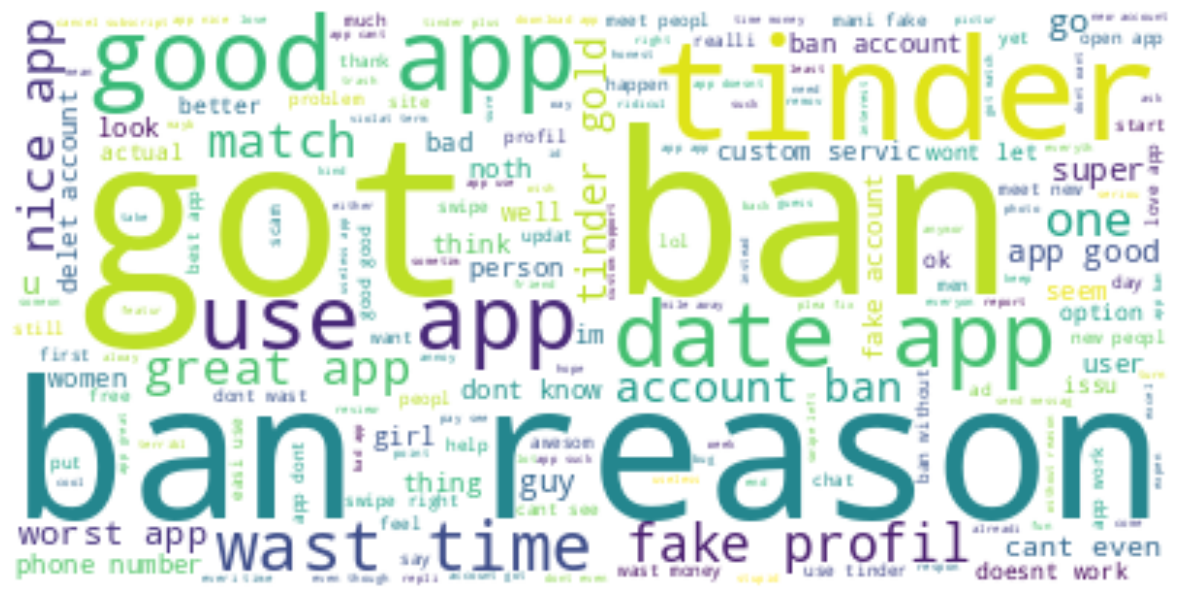

In [ ]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')# downloads the vader_lexicon resource from the Natural Language Toolkit (NLTK) package
sentiments = SentimentIntensityAnalyzer()# create an instance of a sentiment analysis tool, It assigns a polarity score to each text based on the presence and intensity of positive and negative sentiment words in the text
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]#method of the sentiments object takes this text as input and returns a dictionary that contains four keys: "neg", "neu", "pos", and "compound".
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0                                        good applic     0.744     0.000   
1                                     bot fan seller     0.535     0.000   
2                                              สุเไไ     0.000     0.000   
3                                               nice     1.000     0.000   
4  didnt even get match got ban captcha thing ans...     0.086     0.169   

   Neutral  
0    0.256  
1    0.465  
2    1.000  
3    0.000  
4    0.744  


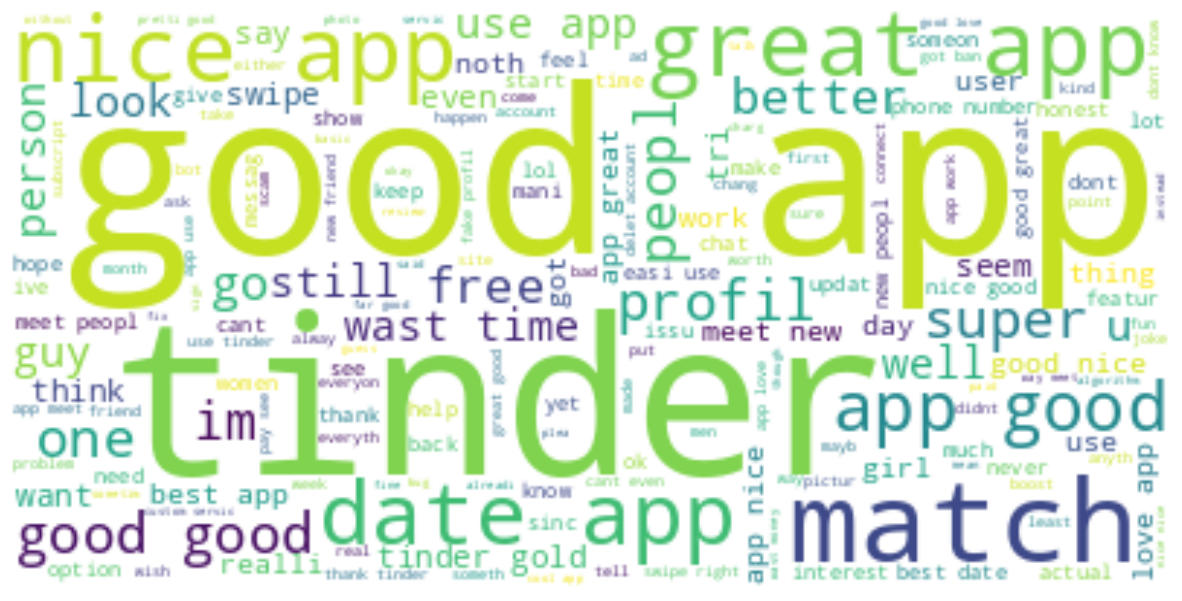

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

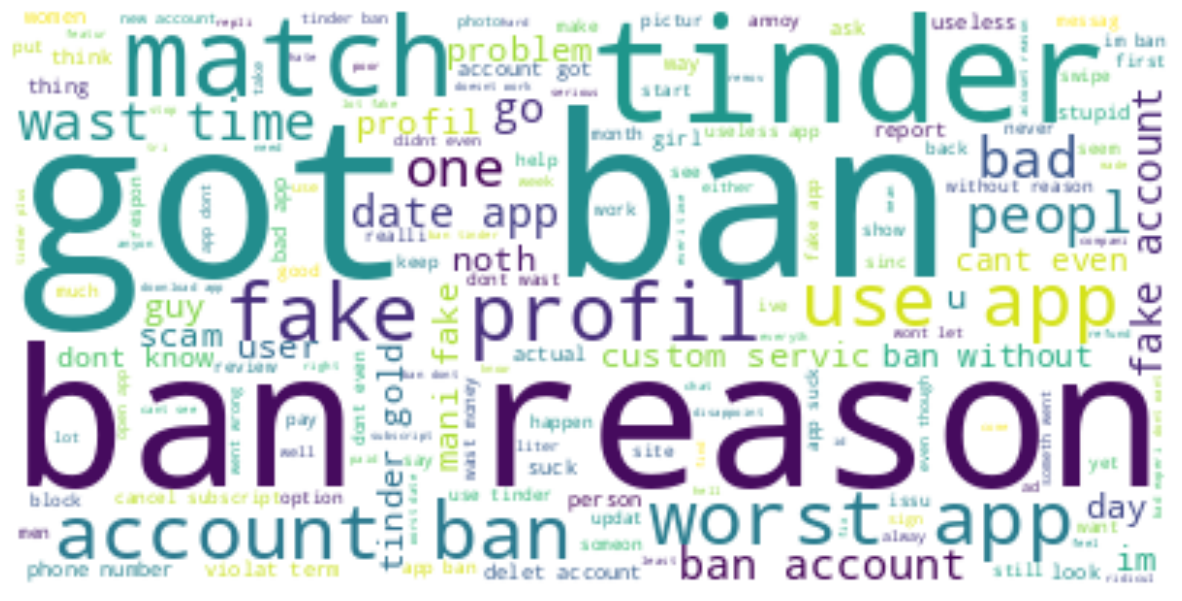

In [ ]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
#total of sentiment scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  87526.55900000008
Negative:  40990.70199999823
Neutral:  176934.76700000098
